In [1]:
#       _ _,---._
#    ,-','       `-.___
#   /-;'               `._
#  /\/          ._   _,'o \
# ( /\       _,--'\,','"`. )
#  |\      ,'o     \'    //\
#  |      \        /   ,--'""`-.
#  :       \_    _/ ,-'         `-._
#   \        `--'  /                )
#    `.  \`._    ,'     ________,','
#      .--`     ,'  ,--` __\___,;'
#       \`.,-- ,' ,`_)--'  /`.,'
#        \( ;  | | )      (`-/
#          `--'| |)       |-/
#            | | |        | |
#            | | |,.,-.   | |_
#            | `./ /   )---`  )
#           _|  /    ,',   ,-'
#  -hrr-   ,'|_(    /-<._,' |--,
#          |    `--'---.     \/ \
#          |          / \    /\  \
#        ,-^---._     |  \  /  \  \
#     ,-'        \----'   \/    \--`.
#    /            \              \   \
#######################################
#                Gruy                 #                  
#######################################

### Import libraries

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import dataset

In [294]:
startup = r"E:/Cours_Simplon/data_scientist/Machine_learning/regression_lineaire/50_Startups.csv"
df_startup = pd.read_csv(startup, sep=",")
X = df_startup.iloc[:, :-1]
y = df_startup.iloc[:, :-1]
print(X.head())

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida


### Transformation variable categorielles en variable numériques

In [295]:
col_quant = pd.get_dummies(df_startup['State'])
col_quant.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [296]:
df_startup = pd.concat([df_startup, col_quant], axis=1)
df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


### Drop colonne state et profit

In [306]:
drop_features = df_startup.drop(["State", "Profit"], axis = 1)
X = drop_features
y = df_startup["Profit"]

### Choix Features

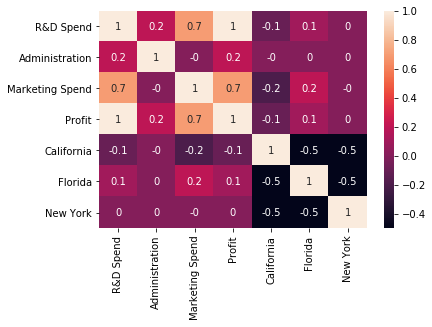

In [298]:
import seaborn as sns
matrice_corr = df_startup.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

### Creation Fonction pour la régression linéaire

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [300]:
def linearRegression (X,y) : 
    ## Split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    ## entrainemennt model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    ### Prediction sur l'ensemble du test
    y_pred = regressor.predict(X_test)
    coef= regressor.coef_
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 =1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
    print('Coefficients : ',regressor.coef_)
    print('MAE : ',mae)
    print('MSE : ',mse)
    print('R² : ',r2)
    print('Adjusted R² : ',adj_r2)
    # un petit graph ca fait toujours plaisir
    to_plot = pd.DataFrame([[y_test.values[i], y_pred[i]] for i in range(len(y_test))], columns=['test', 'pred']).sort_values('test')
    plt.scatter(np.arange(len(y_test)), to_plot['test'], c='red')
    plt.plot(np.arange(len(y_test)), to_plot['pred'])
    return [mae,mse,rmse,r2,adj_r2]

Coefficients :  [ 7.73467193e-01  3.28845975e-02  3.66100259e-02  8.66383692e+01
 -8.72645791e+02  7.86007422e+02]
MAE :  7514.293659640605
MSE :  83502864.03257754
R² :  0.9347068473282424
Adjusted R² :  0.8041205419847272


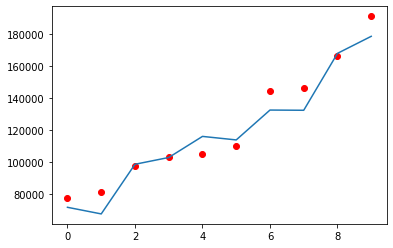

In [301]:
linear_r_1 = linearRegression(X,y)

Coefficients :  [ 8.51613579e-01 -1.69679775e-03 -2.19309465e+02  2.65423501e+02
 -4.61140364e+01]
MAE :  6751.89033648288
MSE :  66885723.01400787
R² :  0.9477002402862408
Adjusted R² :  0.8823255406440418


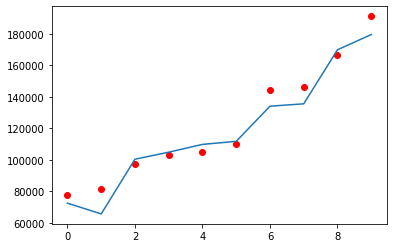

In [302]:
linear_r_2 = linearRegression(X.iloc[:, [0, 1, 3, 4, 5]],y)

Coefficients :  [   0.85127787 -483.16069732 -304.01252687]
MAE :  6789.980111923089
MSE :  67565210.7586371
R² :  0.9471689304016918
Adjusted R² :  0.9207533956025378


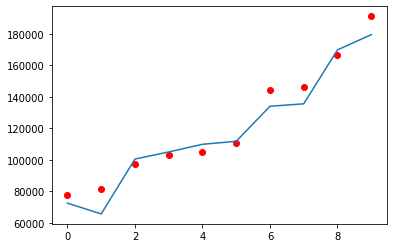

In [303]:
linear_r_3 = linearRegression(X.iloc[:, [0, 3, 5]],y)

Coefficients :  [   0.85108694 -308.76562426]
MAE :  6802.727094890664
MSE :  68148935.31566742
R² :  0.9467125003491181
Adjusted R² :  0.9314875004488662


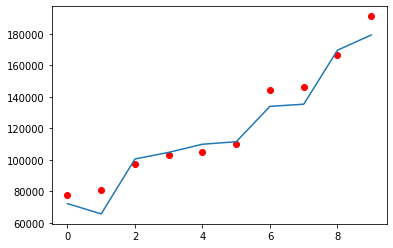

In [304]:
linear_r_4 = linearRegression(X.iloc[:, [0, 3,]],y)

In [305]:
linear =[linear_r_1, linear_r_2, linear_r_3, linear_r_4]
df = pd.DataFrame(linear, index=['Model 1','Model 2','Model 3','Model 4'],columns =['MAE', 'MSE', 'RMSE','R²','Adjusted R²'], dtype = float) 
df

,MAE,MSE,RMSE,R²,Adjusted R²
Model 1,7514.293660,8.350286e+07,9137.990153,0.934707,0.804121
Model 2,6751.890336,6.688572e+07,8178.369215,0.947700,0.882326
Model 3,6789.980112,6.756521e+07,8219.806005,0.947169,0.920753
Model 4,6802.727095,6.814894e+07,8255.236842,0.946713,0.931488
